In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import hashlib
import random
import shutil
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.model_selection import train_test_split

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saikatdatta1994/tea-leaf-disease")

print("Path to dataset files:", path)

100%|██████████| 29.9M/29.9M [00:00<00:00, 92.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/saikatdatta1994/tea-leaf-disease/versions/1


Tahap EDA

In [14]:
# Memeriksa struktur dataset
dataset_path = path

# Menampilkan folder dalam dataset
for root, dirs, files in os.walk(dataset_path):
    print(f"Direktori: {root}")
    print(f"Subfolder: {dirs}")
    print(f"Files: {files}")
    print()

Direktori: /root/.cache/kagglehub/datasets/saikatdatta1994/tea-leaf-disease/versions/1
Subfolder: ['Tea_Leaf_Disease']
Files: []

Direktori: /root/.cache/kagglehub/datasets/saikatdatta1994/tea-leaf-disease/versions/1/Tea_Leaf_Disease
Subfolder: ['gray_blight', 'red_spot', 'helopeltis', 'brown_blight', 'healthy', 'algal_spot']
Files: []

Direktori: /root/.cache/kagglehub/datasets/saikatdatta1994/tea-leaf-disease/versions/1/Tea_Leaf_Disease/gray_blight
Subfolder: []
Files: ['20211228_142002.jpg', 'image_0_2190.jpg', 'image_0_1532.jpg', 'image_0_2728.jpg', 'image_0_2795.jpg', 'image_0_3676.jpg', 'image_0_763.jpg', 'image_0_862.jpg', '20220101_121708.jpg', 'image_0_3092.jpg', 'image_0_1011.jpg', 'image_0_2931.jpg', 'image_0_477.jpg', 'image_0_3194.jpg', 'image_0_3972.jpg', '20211228_153646.jpg', 'image_0_56.jpg', 'image_0_454.jpg', 'image_0_1442.jpg', 'image_0_705.jpg', '20211228_135006.jpg', '20220101_115334.jpg', 'image_0_3869.jpg', 'image_0_431.jpg', 'image_0_2826.jpg', '20220101_114605

In [26]:
# Menampilkan jumlah gambar perkategori
# Daftar subfolder yang ada (kategori penyakit dan sehat)
categories = ['gray_blight', 'red_spot', 'helopeltis', 'brown_blight', 'healthy', 'algal_spot']

# Menampilkan kategori beserta jumlah gambarnya
category_counts = {category: len(os.listdir(os.path.join(dataset_path, category))) for category in categories}
print("Jumlah gambar per kategori:", category_counts)

# Menghitung total gambar pada dataset
image_count = sum(category_counts.values())
print(f"Jumlah total gambar di dataset: {image_count}")

Jumlah gambar per kategori: {'gray_blight': 1000, 'red_spot': 1000, 'helopeltis': 1000, 'brown_blight': 867, 'healthy': 1000, 'algal_spot': 1000}
Jumlah total gambar di dataset: 5867


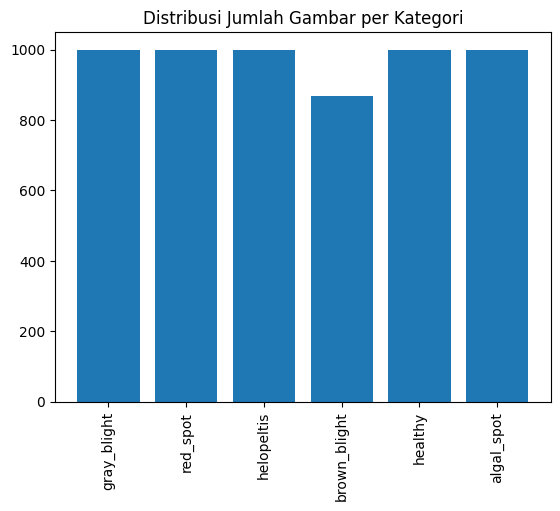

In [27]:
# Distibusi kelas
plt.bar(category_counts.keys(), category_counts.values())
plt.xticks(rotation=90)
plt.title("Distribusi Jumlah Gambar per Kategori")
plt.show()

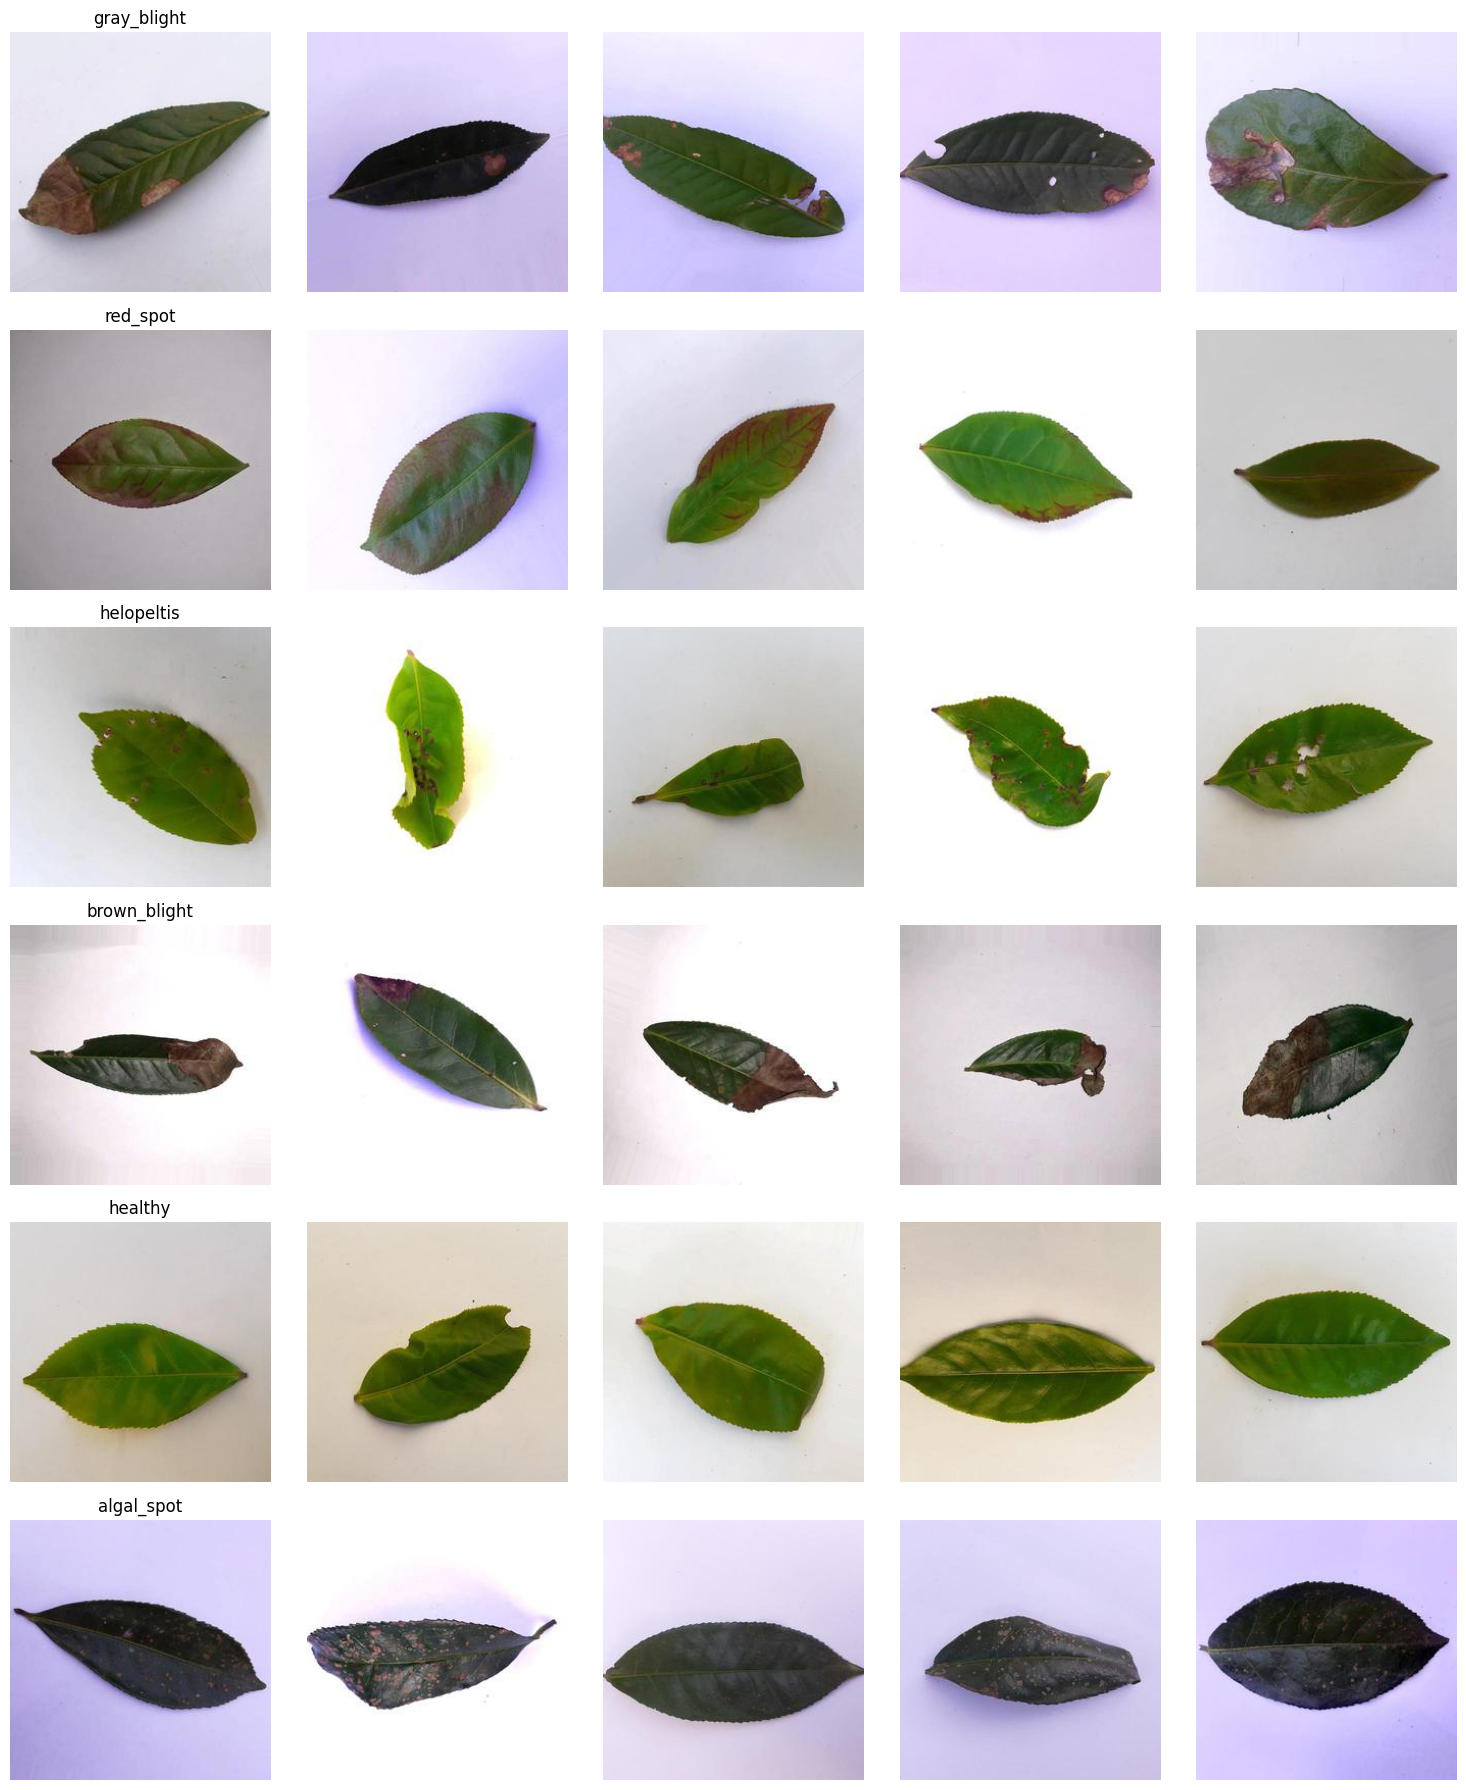

In [28]:
# Visualisasi Gambar sebelum di cerahkan
# Menampilkan gambar secara random dari setiap kategori

# Membuat figure dengan 5 gambar per kategori
fig, axs = plt.subplots(len(categories), 5, figsize=(15, len(categories) * 3))

for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    # Mengambil 5 gambar random dari kategori
    random_images = random.sample(os.listdir(category_path), 5)

    for j, random_image in enumerate(random_images):
        img = Image.open(os.path.join(category_path, random_image))
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
        if j == 0:
            axs[i, j].set_title(category)

plt.tight_layout()
plt.show()

In [29]:
# Memeriksa ukuran gambar dan hanya menampilkan 5 gambar pertama per kelas
def check_image_size(dataset_path, max_images_per_class=5):
    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)
        if os.path.isdir(class_path):
            image_count = 0
            for image_name in os.listdir(class_path):
                if image_count >= max_images_per_class:
                    break  # Hanya tampilkan 5 gambar pertama
                img_path = os.path.join(class_path, image_name)
                try:
                    with Image.open(img_path) as img:
                        print(f'Class: {class_folder}, Image: {image_name}, Size: {img.size}')
                except Exception as e:
                    print(f"Error opening {img_path}: {e}")
                image_count += 1

# Memeriksa ukuran gambar masing-masing dataset (hanya 5 gambar pertama tiap kelas)
check_image_size(dataset_path, max_images_per_class=5)

Class: gray_blight, Image: 20211228_142002.jpg, Size: (256, 256)
Class: gray_blight, Image: image_0_2190.jpg, Size: (256, 256)
Class: gray_blight, Image: image_0_1532.jpg, Size: (256, 256)
Class: gray_blight, Image: image_0_2728.jpg, Size: (256, 256)
Class: gray_blight, Image: image_0_2795.jpg, Size: (256, 256)
Class: red_spot, Image: image_0_2984.jpg, Size: (256, 256)
Class: red_spot, Image: image_0_2795.jpg, Size: (256, 256)
Class: red_spot, Image: image_0_1326.jpg, Size: (256, 256)
Class: red_spot, Image: image_0_3146.jpg, Size: (256, 256)
Class: red_spot, Image: image_0_683.jpg, Size: (256, 256)
Class: helopeltis, Image: image_0_469.jpg, Size: (256, 256)
Class: helopeltis, Image: 20220101_121051.jpg, Size: (256, 256)
Class: helopeltis, Image: image_0_1532.jpg, Size: (256, 256)
Class: helopeltis, Image: image_0_4091.jpg, Size: (256, 256)
Class: helopeltis, Image: 20220101_091601.jpg, Size: (256, 256)
Class: brown_blight, Image: image_0_9563.jpg, Size: (256, 256)
Class: brown_blight,

In [30]:
# Memeriksa gambar yang rusak atau korup
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        try:
            img = Image.open(img_path)
            img.verify()  # Cek apakah gambar valid
        except (IOError, SyntaxError) as e:
            print(f"Corrupted image: {img_path}")

In [31]:
# Memeriksa duplikasi data
# Fungsi untuk menghasilkan hash gambar
def hash_image(image_path):
    with Image.open(image_path) as img:
        img = img.convert('RGB')
        img = img.resize((8, 8))
        pixel_values = list(img.getdata())
        hash_value = hashlib.md5(str(pixel_values).encode()).hexdigest()  # Membuat hash MD5 dari pixel
    return hash_value

# Menyimpan hash gambar untuk mendeteksi duplikat
hashes = {}
duplicates = []

# Mengecek semua gambar dalam dataset
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png')):  # Periksa ekstensi gambar
            image_path = os.path.join(root, file)
            image_hash = hash_image(image_path)

            if image_hash in hashes:
                duplicates.append(image_path)  # Menyimpan gambar yang duplikat
            else:
                hashes[image_hash] = image_path  # Menyimpan hash gambar

# Menampilkan hasil
if duplicates:
    print(f'Terdapat duplikat gambar yang ditemukan sebanyak: {len(duplicates)}')
    for dup in duplicates:
        print(dup)
else:
    print("Tidak ditemukan gambar duplikat.")

Tidak ditemukan gambar duplikat.


Tahap Preprocessing

In [32]:
# Resize gambar
new_size = (224, 224)

# Mengecek dan meresize setiap gambar dalam folder
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png')):  # Memeriksa format gambar
            image_path = os.path.join(root, file)

            # Membuka gambar dan meresize
            image = Image.open(image_path)
            resized_image = image.resize(new_size)

            # Menyimpan gambar yang telah diresize
            resized_image.save(image_path)


In [35]:
# Memeriksa ukuran salah satu gambar setelah di resize
image_path = '/root/.cache/kagglehub/datasets/saikatdatta1994/tea-leaf-disease/versions/1/Tea_Leaf_Disease/red_spot/image_0_683.jpg/'
image = Image.open(image_path)

# Melihat ukuran gambar setelah di-resize
print("Ukuran gambar setelah di-resize:", resized_image.size)

Ukuran gambar setelah di-resize: (224, 224)


In [41]:
# Meningkatkan kecerahan gambar
output_path = '/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/DatasetDaunTeh_hasil_Preprocessing2/'

# Pastikan folder output ada
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Mencerahkan gambar
def adjust_brightness(image, alpha=1, beta=50):
    # Gunakan convertScaleAbs untuk penyesuaian kecerahan
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Loop untuk membaca gambar di setiap folder
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    if os.path.isdir(category_path):  # Pastikan hanya folder yang diproses
        # Membuat folder kategori di output
        output_category_path = os.path.join(output_path, category)
        if not os.path.exists(output_category_path):
            os.makedirs(output_category_path)

        # Loop untuk setiap gambar dalam kategori
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)

            if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # Cek ekstensi gambar
                # Baca gambar
                img = cv2.imread(image_path)

                if img is not None:
                    # Lakukan penyesuaian kecerahan
                    brightened_img = adjust_brightness(img, alpha=1, beta=50)

                    # Tentukan path untuk menyimpan gambar yang telah diproses
                    output_image_path = os.path.join(output_category_path, image_name)

                    # Simpan gambar yang telah diproses
                    cv2.imwrite(output_image_path, brightened_img)
                    print(f"Processed: {output_image_path}")
                else:
                    print(f"Unable to read image: {image_path}")


Streaming output truncated to the last 5000 lines.
Processed: /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/DatasetDaunTeh_hasil_Preprocessing2/gray_blight/image_0_3250.jpg
Processed: /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/DatasetDaunTeh_hasil_Preprocessing2/gray_blight/image_0_3123.jpg
Processed: /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/DatasetDaunTeh_hasil_Preprocessing2/gray_blight/image_0_3779.jpg
Processed: /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/DatasetDaunTeh_hasil_Preprocessing2/gray_blight/image_0_2018.jpg
Processed: /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/DatasetDaunTeh_hasil_Preprocessing2/gray_blight/image_0_2907.jpg
Processed: /content

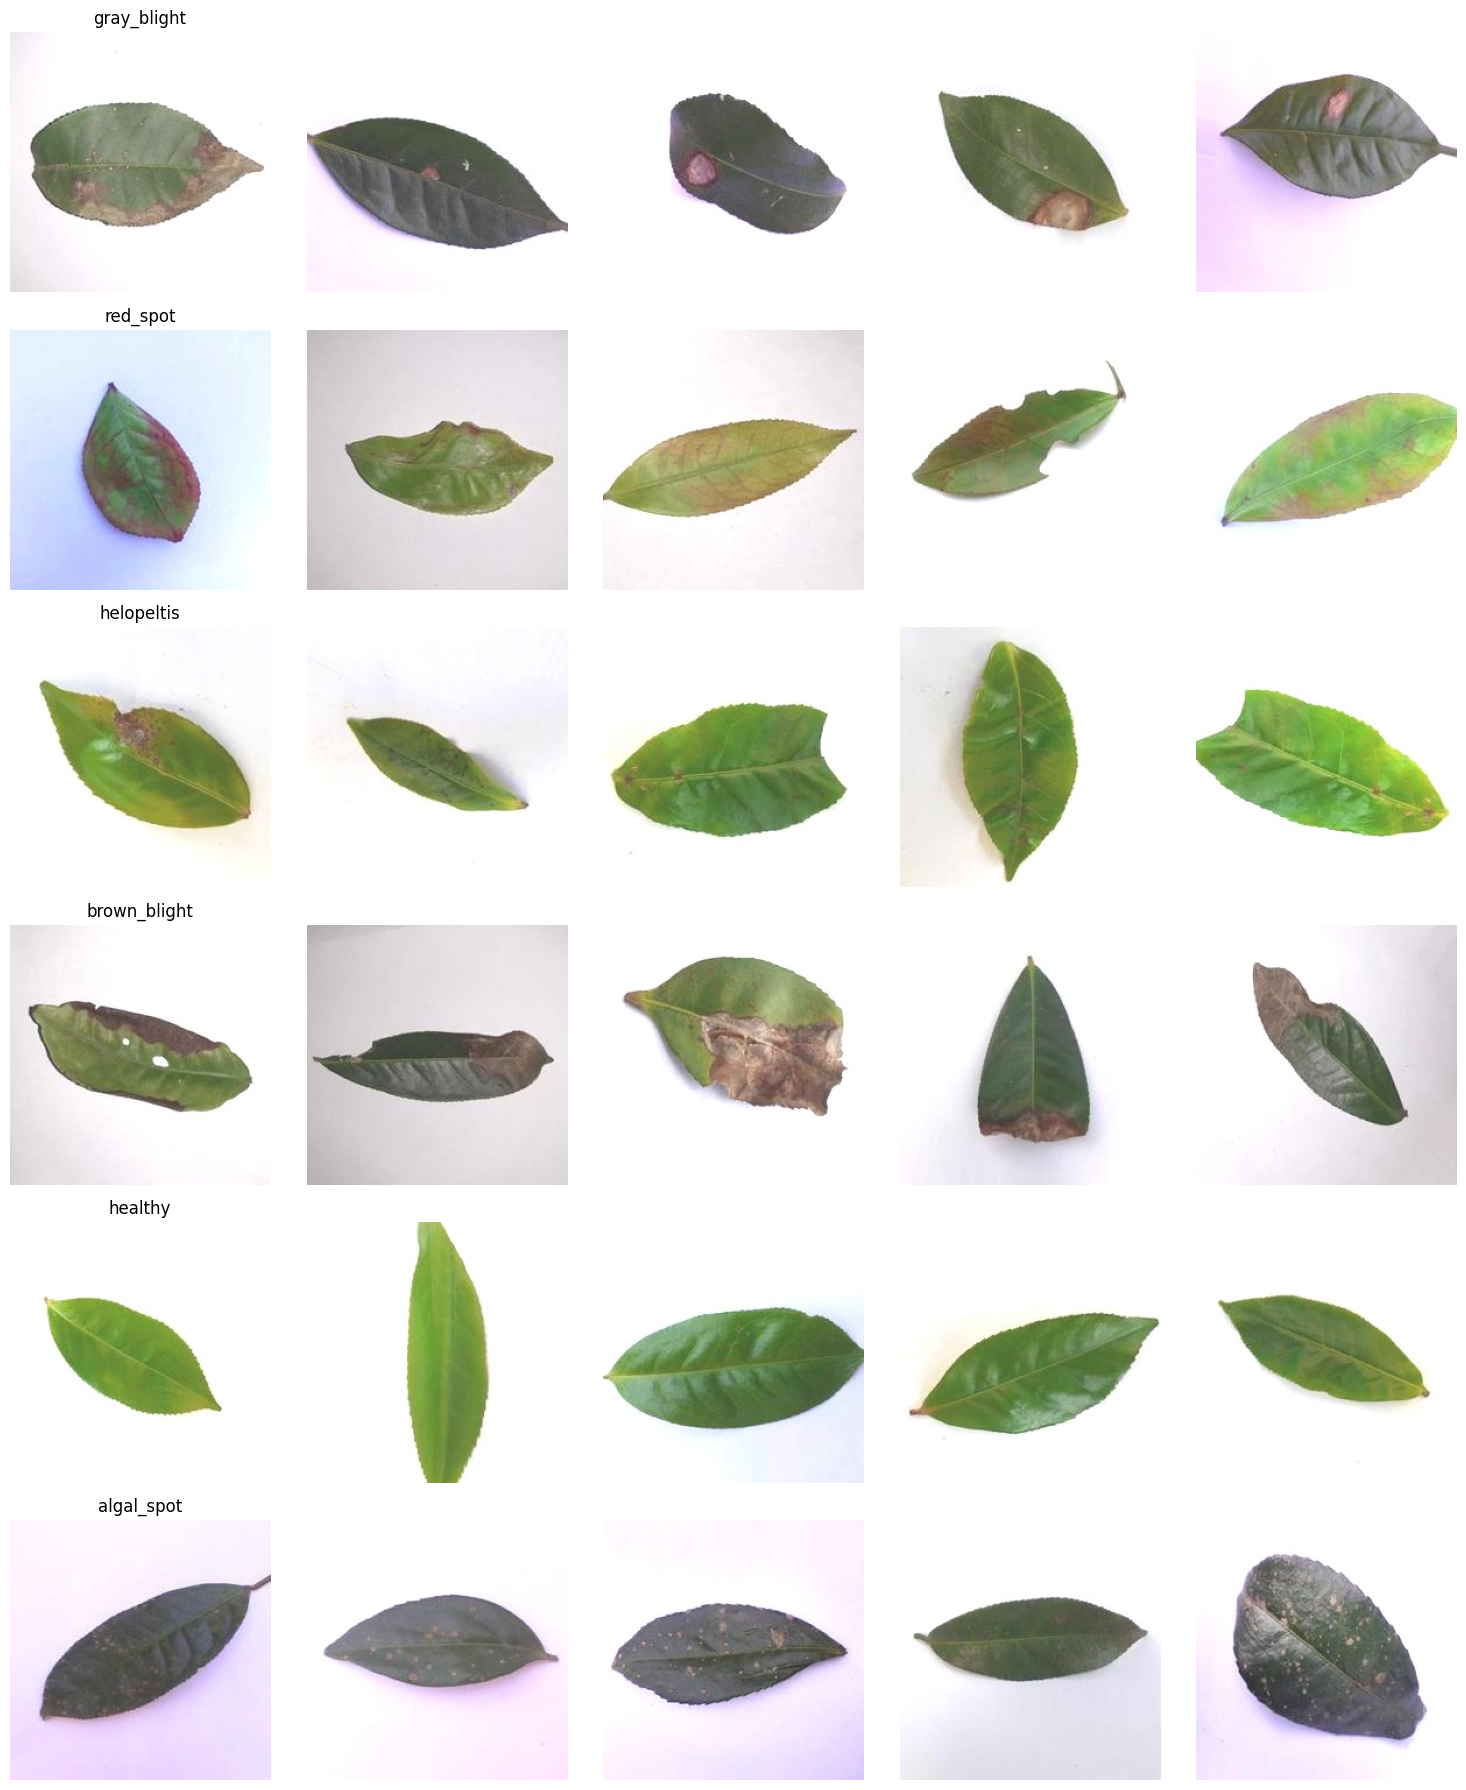

In [44]:
# Visualisasi Gambar setelah di cerahkan
# Menampilkan gambar secara random dari setiap kategori

# Membuat figure dengan 5 gambar per kategori
fig, axs = plt.subplots(len(categories), 5, figsize=(15, len(categories) * 3))

for i, category in enumerate(categories):
    category_path = os.path.join(output_path, category)
    # Mengambil 5 gambar random dari kategori
    random_images = random.sample(os.listdir(category_path), 5)

    for j, random_image in enumerate(random_images):
        img = Image.open(os.path.join(category_path, random_image))
        axs[i, j].imshow(img)
        axs[i, j].axis('off')
        if j == 0:
            axs[i, j].set_title(category)

plt.tight_layout()
plt.show()

In [48]:
# DON'T EDIT
# Memisahkan data untuk Test

# Direktori test baru
#test_dir = '/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/test'

# Membuat folder untuk test jika belum ada
#if not os.path.exists(test_dir):
    #os.makedirs(test_dir)

# Loop untuk setiap subfolder (kelas)
#for class_name in os.listdir(output_path):
    #class_path = os.path.join(output_path, class_name)

    #if os.path.isdir(class_path):
        # Membuat folder test untuk kelas tersebut
        #class_test_dir = os.path.join(test_dir, class_name)
        #if not os.path.exists(class_test_dir):
            #os.makedirs(class_test_dir)

        # Ambil daftar gambar dalam subfolder kelas
        #image_files = os.listdir(class_path)

        # Periksa apakah ada gambar dalam folder
        #if len(image_files) == 0:
            #print(f"Tidak ada gambar dalam kelas {class_name}.")
            #continue

        # Tentukan jumlah gambar yang akan dipindahkan ke test set (misalnya 10%)
        #num_test_images = int(0.1 * len(image_files))

        # Pastikan ada gambar yang akan dipindahkan
        #if num_test_images == 0:
            #print(f"Tidak ada gambar yang cukup untuk dipindahkan ke test set untuk kelas {class_name}.")
            #continue

        # Pilih gambar secara acak
        #test_images = random.sample(image_files, num_test_images)

        # Pindahkan gambar terpilih ke folder test
        #for image in test_images:
            #src = os.path.join(class_path, image)
            #dest = os.path.join(class_test_dir, image)
            #print(f"Memindahkan {src} ke {dest}")  # Debugging line
            #shutil.move(src, dest)


Memindahkan /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/DatasetDaunTeh_hasil_Preprocessing2/gray_blight/image_0_2623.jpg ke /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/test/gray_blight/image_0_2623.jpg
Memindahkan /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/DatasetDaunTeh_hasil_Preprocessing2/gray_blight/image_0_3349.jpg ke /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/test/gray_blight/image_0_3349.jpg
Memindahkan /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/DatasetDaunTeh_hasil_Preprocessing2/gray_blight/image_0_442.jpg ke /content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/test/gray_blight/image_0_442.jpg


In [52]:
# Menampilkan jumlah gambar perkategori setelah memisahkan data ke Test
# Daftar subfolder yang ada (kategori penyakit dan sehat)
categories = ['gray_blight', 'red_spot', 'helopeltis', 'brown_blight', 'healthy', 'algal_spot']

# Menampilkan kategori beserta jumlah gambarnya
category_counts = {category: len(os.listdir(os.path.join(output_path, category))) for category in categories}
print("Jumlah gambar per kategori:", category_counts)

# Menghitung total gambar pada dataset
image_count = sum(category_counts.values())
print(f"Jumlah total gambar di dataset setelah memisahkan gambar untuk Test: {image_count}")

Jumlah gambar per kategori: {'gray_blight': 900, 'red_spot': 900, 'helopeltis': 900, 'brown_blight': 781, 'healthy': 900, 'algal_spot': 900}
Jumlah total gambar di dataset setelah memisahkan gambar untuk Test: 5281


In [53]:
# Split data train (80%) dan validation (20%) menggunakan ImageDataGenerator dengan parameter validation_split=0.2
datagen_train_val = ImageDataGenerator(
    rescale=1./255,  # Normalisasi gambar
    validation_split=0.2,  # 20% untuk validasi
    # Augmentasi untuk training (menambahkan variasi gambar)
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data test (hanya normalisasi, tanpa augmentasi)
datagen_test = ImageDataGenerator(rescale=1./255)  # Hanya normalisasi

# Generator untuk data training
train_generator = datagen_train_val.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Generator untuk data validasi
validation_generator = datagen_train_val.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Generator untuk data test (hanya normalisasi tanpa augmentasi)
test_generator = datagen_test.flow_from_directory(
    '/content/drive/Shared drives/C242-PS290 Capstone Team Project/Machine Learning/Dataset_Preprocessing2_DaunTeh/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Hanya untuk evaluasi, tanpa augmentasi
)


Found 4225 images belonging to 6 classes.
Found 1056 images belonging to 6 classes.
Found 586 images belonging to 6 classes.
